<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Ответ:

Для воспроизводимости результатов между итерациями

Под капотом у компьютеров используется псевдогенератор случайных чисел (последовательности выдаваемых чисел уже созданы), соответственно, фиксируя random_seed мы фиксируем состояние нашего рандомайзера.

Особенно актуально для сплитов данных и настройки тюнеров


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [1]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [x] Отобразите 30 случайных строк тренировочного датасета.
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [x] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [x] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Если отсортировать по какой-либо переменной (например по цене), то можно посмотреть экземпляры соответствующие минимальным и максимальным значений

- [x] Достаточно ли метода duplicated для анализа дубликатов? Почему?


**0.15 балла**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
# 30 случайных
df_train.sample(30)

name  year  selling_price  \
519                         Hyundai EON Era Plus  2012         270000   
2779           Volkswagen Ameo 1.5 TDI Trendline  2017         575000   
3445       Mahindra Scorpio VLX 2WD AIRBAG BSIII  2013         600000   
5811            Mahindra Scorpio 2.6 Turbo 9 Str  2008         320000   
3812              Mahindra Bolero Power Plus SLE  2017         650000   
6818      Maruti Eeco 5 STR With AC Plus HTR CNG  2011         209000   
842        Volkswagen Polo Diesel Trendline 1.2L  2013         350000   
266                Hyundai Grand i10 CRDi Sportz  2015         395000   
4971       Volkswagen Polo Diesel Trendline 1.2L  2011         220000   
4625                           Hyundai i10 Magna  2010         225000   
2578               Nissan Micra Active XL Petrol  2014         225000   
1789            Tata New Safari DICOR 2.2 EX 4x2  2011         350000   
5171                             Tata Indigo CR4  2012         229999   
5542       Tata Manza Aura (ABS) Quadrajet BS IV  2010         200000   
3893                  Tata Zest Revotron 1.2T XM  2015         300000   
3588      Ford EcoSport 1.5 Diesel Titanium BSIV  2019         975000   
4806                       Tata Safari Storme EX  2015         503000   
5784        Hyundai Elite i20 Sportz Plus Diesel  2018         750000   
4635                          Hyundai EON Sportz  2012         150000   
5349              Maruti Swift AMT ZXI Plus BSIV  2019         650000   
4340                    Hyundai Accent Executive  2012         225000   
4547                     Mahindra XUV500 W9 BSIV  2018        1525000   
6805             Ambassador Grand 2000 DSZ PW CL  2008         200000   
2879                         Mahindra Bolero SLX  2007         245000   
5831                       Tata Indica V2 DLS TC  2004          50000   
4041              Tata Indigo CS LS (TDI) BS III  2012         150000   
4712  Mercedes-Benz E-Class E 220 CDI Avantgarde  2013        1925000   
522                  Maruti Zen Estilo LXI BSIII  2010         200000   
3953                             Maruti Ritz LXI  2011         215000   
1331                             Datsun RediGO A  2019         270000   

      km_driven    fuel seller_type transmission                 owner  \
519       43755  Petrol      Dealer       Manual          Second Owner   
2779      40000  Diesel  Individual       Manual           First Owner   
3445      60000  Diesel  Individual       Manual           First Owner   
5811     100000  Diesel  Individual       Manual          Second Owner   
3812     120000  Diesel  Individual       Manual           First Owner   
6818          1     CNG  Individual       Manual  Fourth & Above Owner   
842       80000  Diesel  Individual       Manual           Third Owner   
266       80000  Diesel  Individual       Manual          Second Owner   
4971     222300  Diesel  Individual       Manual           First Owner   
4625      50000  Petrol      Dealer       Manual           First Owner   
2578     100000  Petrol  Individual       Manual           First Owner   
1789     156000  Diesel  Individual       Manual           First Owner   
5171     186000  Diesel  Individual       Manual           First Owner   
5542     188000  Diesel  Individual       Manual          Second Owner   
3893      70000  Petrol  Individual       Manual           First Owner   
3588      30000  Diesel  Individual       Manual           First Owner   
4806     110000  Diesel  Individual       Manual           First Owner   
5784      40000  Diesel  Individual       Manual           First Owner   
4635      40000  Petrol  Individual       Manual           First Owner   
5349      15000  Petrol  Individual    Automatic           First Owner   
4340     109322  Petrol  Individual       Manual          Second Owner   
4547      46000  Diesel  Individual       Manual           First Owner   
6805      80000  Diesel  Individual       Manual           Third Owner   
2879

In [5]:
# Первые 5
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [6]:
# Последние 5
df_train.tail(5)

name  year  selling_price  km_driven    fuel  \
6994       Hyundai i20 Magna  2013         320000     110000  Petrol   
6995   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997         Tata Indigo CR4  2013         290000      25000  Diesel   
6998         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
6994  82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996   73.9 bhp             190Nm@ 2000rpm    5.0  
6997     70 bhp        140Nm@ 1800-3000rpm    5.0  
6998     70 bhp        140Nm@ 1800-3000rpm    5.0

In [7]:
# Ч. Пропуски и дубликаты
pd.set_option('display.max_columns', 100)
# Проверка на пропуски
print('Количество пропусков по столбцам:')
print(df_train.isna().sum()[df_train.isna().sum() > 0])


Количество пропусков по столбцам:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


In [8]:
print('\nКоличество дубликатов:')
print(df_train.duplicated().sum())


Количество дубликатов:
985


In [9]:
# Посмотрим на полные дубликаты
df_train[df_train.duplicated()].sort_values(by=['name'], ascending=False)

name  year  selling_price  km_driven  \
1468        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
962         Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
3623        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
2293        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
3291        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
...                                    ...   ...            ...        ...   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   

        fuel seller_type transmission        owner     mileage   engine  \
1468  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
962   Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
3623  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
2293  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
3291  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
...      ...         ...          ...          ...         ...      ...   
2787  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
4485  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
6640  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   

       max_power               torque  seats  
1468     190 bhp                400Nm    5.0  
962      190 bhp                400Nm    5.0  
3623     190 bhp                400Nm    5.0  
2293     190 bhp                400Nm    5.0  
3291     190 bhp                400Nm    5.0  
...          ...                  ...    ...  
2787     188 bhp  400nm@ 1750-3000rpm    5.0  
4485     188 bhp  400nm@ 1750-3000rpm    5.0  
6640     188 bhp  400nm@ 1750-3000rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  

[985 rows x 13 columns]

## Вопросы
###  Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Если отсортировать по какой-либо переменной (например по цене), то можно посмотреть экземпляры соответствующие минимальным и максимальным значений
### Достаточно ли метода duplicated для анализа дубликатов? Почему?

Не совсем, так как он оставляет только первое вхождение. Обычно нужно комбинировать вместе с другими техниками:

- Для подсчета количества дублей
- Поиск неполных дубликатов, когда есть "нестрогое" соответствие текстовых полей


In [10]:
# Группируем дубликаты для анализа (cхлопываем до одной позиции с подсчетом количества вхождений)
duplicates = df_train[df_train.duplicated(keep=False)]
grouped_duplicates = duplicates.groupby(list(df_train.columns)).size().reset_index()
print("Сгруппированные дубликаты:")
grouped_duplicates

Сгруппированные дубликаты:


name  year  selling_price  \
0               Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000   
1                            Audi Q5 3.0 TDI Quattro  2014        1850000   
2                         Audi Q5 35TDI Premium Plus  2018        3975000   
3                      BMW 3 Series 320d Luxury Line  2012        1300000   
4                 BMW 3 Series 320d Luxury Line Plus  2017        2600000   
..                                               ...   ...            ...   
476      Volkswagen Polo 2015-2019 1.0 MPI Trendline  2018         560000   
477  Volkswagen Polo 2015-2019 1.5 TDI Highline Plus  2018         650000   
478             Volkswagen Vento 1.5 TDI Highline AT  2016        1000000   
479                            Volvo V40 D3 R-Design  2018        2475000   
480                   Volvo XC40 D4 Inscription BSIV  2019        3800000   

     km_driven    fuel seller_type transmission         owner     mileage  \
0        22000  Diesel      Dealer    Automatic   First Owner  15.73 kmpl   
1        76131  Diesel  Individual    Automatic   First Owner  13.22 kmpl   
2        31800  Diesel      Dealer    Automatic   First Owner  17.01 kmpl   
3       140000  Diesel  Individual    Automatic  Second Owner  18.88 kmpl   
4        44000  Diesel      Dealer    Automatic   First Owner  22.69 kmpl   
..         ...     ...         ...          ...           ...         ...   
476      14495  Petrol      Dealer       Manual   First Owner  18.78 kmpl   
477      40000  Diesel      Dealer       Manual   First Owner  20.14 kmpl   
478      60000  Diesel  Individual    Automatic   First Owner  22.15 kmpl   
479       2000  Diesel      Dealer    Automatic   First Owner   16.8 kmpl   
480      20000  Diesel  Individual    Automatic   First Owner   18.0 kmpl   

      engine   max_power               torque  seats   0  
0    1968 CC  174.33 bhp  380Nm@ 1750-2500rpm    5.0   2  
1    2967 CC   241.4 bhp  580Nm@ 1400-3250rpm    5.0   2  
2    1968 CC     188 bhp  400nm@ 1750-3000rpm    5.0   6  
3    1995 CC     184 bhp  380Nm@ 1750-2750rpm    5.0   2  
4    1995 CC     190 bhp  400Nm@ 1750-2750rpm    5.0   2  
..       ...         ...                  ...    ...  ..  
476   999 CC      75 bhp   95Nm@ 3000-4300rpm    5.0   2  
477  1498 CC      88 bhp  230Nm@ 1500-2500rpm    5.0   2  
478  1498 CC   108.6 bhp  250Nm@ 1500-3000rpm    5.0   2  
479  1984 CC     150 bhp  350Nm@ 1500-2750rpm    5.0  23  
480  1969 CC     190 bhp                400Nm    5.0  26  

[481 rows x 14 columns]

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title='Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Выводы по датасету

### Общие выводы

- Общий объем данных на трейне - 6999, на тесте - 1000
- Датасет представляет из себя данные по продажам по машина и их стоимости.
- Внутри датасета присутствуют полные дубликаты, которые могли появится вследствие дедубликации 123

### Пропуски

| Столбец   | Кол-во пропусков |
|-----------|------------------|
| mileage   | 202              |
| engine    | 202              |
| max_power | 196              | 
| torque    | 203              | 
| seats     | 202              |


### Дубли

В объявлениях встречаются полные дубликаты. Причем их количество варьируется от пары, до 30 штук для отдельных позиций машин


### Корреляции

Сильные корреляции:
- Между годом и пробегом есть обратная корреляция (Чем раньше была выпущена машина, тем больше её пробег)

Средние корреляции:

Прямая:

- Мощность и тип топлива (дизель/бензин)
- Мощность и стоимость
- Мощность и тип трансмиссии (механика/автомат и т.д.
- Цена и год (чем раньше была выпущена машина, тем меньше её цена)

Обратная:
- Цена и пробег


***Заметка: хочется год перекодировка в возраст машины `age` (текущий год - год выпука). Тогда у нас часть обратных корреляций станут прямыми.***

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
# Зададим числовые и другие столбцы
num_features = list(df_train.select_dtypes(exclude=['object', 'bool', 'datetime64[ns]']).columns)
cat_features = list(df_train.select_dtypes(include=['object', 'bool']).columns)

num_features.remove('selling_price')

print('Числовые столбцы:', num_features)
print('Категориальные столбцы:', cat_features)

Числовые столбцы: ['year', 'km_driven', 'seats']
Категориальные столбцы: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [13]:
from typing import Union, Optional
from sklearn.base import TransformerMixin

df_columns = list(df_train.columns)

from sklearn import set_config

set_config(transform_output="pandas")


# Комментарий, я сгорел на том, что комбинация ColumnTransformer & SimpleImputer дропает название фичей и меняет их местами...
# Поэтому написал свой statefull 
class MyStateFullFillerTransformer(TransformerMixin):

    def __init__(
        self,
        strategy: str,
        cols: set[str],
    ) -> None:
        self.strategy = strategy
        self.cols = set(cols)
        self.state: dict[str, Union[float, int]] = {}

    def fit(self, X: pd.DataFrame, y=None, cols: Optional[list[str]] = None) -> 'MyStateFullFillerTransformer':
        if cols:
            self.cols = self.cols | set(cols)

        for col in self.cols:
            if col not in self.cols:
                continue

            if col in self.state:
                continue

            if self.strategy == 'mean':
                self.state[col] = np.nanmean(X[col])
            if self.strategy == 'median':
                self.state[col] = np.nanmedian(X[col])

        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        for col in self.cols:
            X[col] = X[col].fillna(value=self.state[col])
        return X

    def fit_transform(self, X, y=None, **fit_params) -> pd.DataFrame:
        self.fit(X, y)
        return self.transform(X, y)


In [14]:
# Разные Stateful трансформеры для разных колонок
preprocessor = MyStateFullFillerTransformer(
    strategy='median',
    cols=num_features,
)

df_train = preprocessor.fit_transform(df_train)
print(df_train.isna().sum()[df_train.isna().sum() > 0])


mileage      202
engine       202
max_power    196
torque       203
dtype: int64


In [15]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
4     Individual       Manual           First Owner  20.14 kmpl  1197 CC   
...          ...          ...                   ...         ...      ...   
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
6994   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996    73.9 bhp             190Nm@ 2000rpm    5.0  
6997      70 bhp        140Nm@ 1800-3000rpm    5.0  
6998      70 bhp        140Nm@ 1800-3000rpm    5.0  

[6999 rows x 13 columns]

По-прежнему остались пропуски в тех местах, где плохое написание)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [16]:
features_cols = [*num_features, *cat_features]

df_train_duplicated = df_train.groupby(features_cols).size().reset_index()
df_train_duplicated = df_train_duplicated[df_train_duplicated[0] > 1]
df_train_duplicated

year  km_driven  seats                                  name    fuel  \
28    1999     198000    5.0             Mitsubishi Lancer 2.0 GLd  Diesel   
35    2000      90000    5.0                        Maruti Alto LX  Petrol   
77    2003      90000    4.0                   Maruti 800 Std MPFi  Petrol   
103   2004      80000    4.0                   Maruti 800 AC BSIII  Petrol   
112   2004     110000    5.0                    Honda City 1.5 GXI  Petrol   
...    ...        ...    ...                                   ...     ...   
5612  2020       5000    5.0                      Maruti Swift VXI  Petrol   
5618  2020       5500    5.0            Honda Civic ZX Diesel BSIV  Diesel   
5639  2020      32000    5.0             Hyundai Xcent 1.2 VTVT SX  Petrol   
5641  2020      40000    5.0             Tata Zest Revotron 1.2 XT  Petrol   
5642  2020      40000    8.0  Toyota Innova Crysta 2.7 GX AT 8 STR  Petrol   

     seller_type transmission                 owner     mileage   engine  \
28    Individual       Manual          Second Owner   14.8 kmpl  1998 CC   
35    Individual       Manual          Second Owner   19.7 kmpl   796 CC   
77    Individual       Manual  Fourth & Above Owner   16.1 kmpl   796 CC   
103   Individual       Manual          Second Owner   16.1 kmpl   796 CC   
112   Individual       Manual           Third Owner   12.8 kmpl  1493 CC   
...          ...          ...                   ...         ...      ...   
5612  Individual       Manual           First Owner  21.21 kmpl  1197 CC   
5618      Dealer       Manual           First Owner   26.8 kmpl  1597 CC   
5639  Individual       Manual           First Owner  20.14 kmpl  1197 CC   
5641  Individual       Manual           First Owner  17.57 kmpl  1193 CC   
5642  Individual    Automatic           First Owner  10.75 kmpl  2694 CC   

      max_power                 torque  0  
28       68 bhp  12.5@ 3,000(kgm@ rpm)  2  
35     46.3 bhp          62Nm@ 3000rpm  2  
77       37 bhp          59Nm@ 2500rpm  2  
103      37 bhp          59Nm@ 2500rpm  3  
112     100 bhp       13.1kgm@ 4600rpm  2  
...         ...                    ... ..  
5612  81.80 bhp         113Nm@ 4200rpm  3  
5618    118 bhp         300Nm@ 2000rpm  2  
5639  81.86 bhp      113.75nm@ 4000rpm  2  
5641   88.7 bhp    140Nm@ 1500-4000rpm  4  
5642  163.7 bhp         245Nm@ 4000rpm  2  

[624 rows x 13 columns]

In [17]:
df_train = df_train.drop_duplicates(subset=features_cols, keep='first').reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [18]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [19]:
def preprocess_col(feature_val: str) -> float:
    if isinstance(feature_val, str):
        try:
            return float(feature_val.split()[0])
        except ValueError:
            # Если нельзя сконвертировать - возвращаем np.nan
            print(feature_val)
            return np.nan
    return feature_val


def remove_measurements(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].apply(preprocess_col).astype(float)
    return df


def convert_to_float(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].astype(float)
    return df


measurable_cols = ['mileage', 'engine', 'max_power']

# Для трейна
df_train = remove_measurements(df_train, measurable_cols)
df_train = convert_to_float(df_train, measurable_cols)
df_train = df_train.drop(columns=['torque'])
# Для теста
df_test = remove_measurements(df_test, measurable_cols)
df_test = convert_to_float(df_test, measurable_cols)
df_test = df_test.drop(columns=['torque'])

 bhp


In [20]:
# Обновляем наш стейт новыми колонками
preprocessor.fit(df_train, cols=measurable_cols)
print(preprocessor.state)

{'km_driven': 60000.0, 'year': 2015.0, 'seats': 5.0, 'engine': 1248.0, 'mileage': 19.369999999999997, 'max_power': 81.86}


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

!!! Это нельзя сделать без удаления nan, поэтому мы волевым решением делаем наконец-то трансформ

- [x] Осуществите приведение столбцов к необходимому типу.

In [21]:
df_train = preprocessor.transform(df_train)
df_test = preprocessor.transform(df_test)

# Теперь пропусков НЕТ!
print(df_train.isna().sum()[df_train.isna().sum() > 0])


Series([], dtype: int64)


In [22]:
def convert_to_int(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    for col in cols:
        df[col] = df[col].astype(int)
    return df


df_train = convert_to_int(df_train, measurable_cols)
df_test = convert_to_int(df_test, measurable_cols)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   int64  
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   int64  
 11  seats          5840 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 547.6+ KB


In [23]:
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
# Зададим числовые и другие столбцы
num_features = list(df_train.select_dtypes(exclude=['object', 'bool', 'datetime64[ns]']).columns)
cat_features = list(df_train.select_dtypes(include=['object', 'bool']).columns)

num_features.remove('selling_price')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('Train')
display(df_train[num_features + ['selling_price']].describe())
print('Test')
display(df_test[num_features + ['selling_price']].describe())

Train


year  km_driven  mileage  engine  max_power   seats  selling_price
count 5840.00    5840.00  5840.00 5840.00    5840.00 5840.00        5840.00
mean  2013.43   73952.24    18.99 1429.45      87.58    5.43      522960.09
std      4.10   60071.14     4.01  485.66      31.62    0.98      535432.00
min   1983.00       1.00     0.00  624.00       0.00    2.00       29999.00
25%   2011.00   39000.00    16.00 1197.00      68.00    5.00      250000.00
50%   2014.00   70000.00    19.00 1248.00      81.00    5.00      405000.00
75%   2017.00  100000.00    22.00 1498.00      99.00    5.00      640000.00
max   2020.00 2360457.00    42.00 3604.00     400.00   14.00    10000000.00

Test


year  km_driven  mileage  engine  max_power   seats  selling_price
count 1000.00    1000.00  1000.00 1000.00    1000.00 1000.00        1000.00
mean  2013.68   71393.34    18.91 1454.88      90.51    5.40      617901.04
std      4.01   48486.22     3.99  522.00      34.88    0.91      758553.86
min   1995.00    1303.00     0.00  624.00      34.00    4.00       31000.00
25%   2011.00   37000.00    16.00 1197.00      69.00    5.00      250000.00
50%   2014.00   61500.00    19.00 1248.00      82.00    5.00      434999.00
75%   2017.00  100000.00    22.00 1582.00     102.00    5.00      670000.00
max   2020.00  375000.00    32.00 3604.00     280.00    9.00     6000000.00

## Сравнение

Числовые столбцы

Переменная `year`:

   - Средние: совпадают

   - median (50%): совпадают

   - Диапазоны Min/max: отличается min значения, в трейне - 1983, в тесте - 1995

Переменная `km_driven`:

   - Средние: отличаются на около (1500 км) - 3%

   - median (50%): В тесте у автомобилей на 1500км медиана больше, чем в трейне

   - Диапазоны Min/max:

Переменная `mileage`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `engine`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `max_power`:

   - Средние: Практически совпадают

   - median (50%): Практически совпадает

   - Диапазоны Min/max: min - совпадает, max больше в train

Переменная `seats`:

   - Средние: Практически совпадают

   - median (50%): Совпадают

   - Диапазоны Min/max: min - совпадает, max больше в train
    
Переменная `selling_price`:

   - Средние: отличаются на 3 %

   - median (50%): Отличает на 11% (в тесте больше)

   - Диапазоны Min/max: min отличается незначительно, max больше в трейне (1млн против 600к)

 
Выводы: по числовым характеристикам на train и тесты мы имеем не полные эквиваленты по стат. распределения, но границы и средние значения отличаются незначительно (менее 5%)


In [25]:
print('Train')
display(df_train[cat_features].describe())
print('Test')
display(df_test[cat_features].describe())

Train


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Test


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

## Выводы


По топ значениям трейн и тест сопадают по всем, кроме модели. Хотя марка `name` совпадает

Уникальность больше в трейне по этой переменной.

In [26]:
# Было 13 колонок, но мы удалили torque
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

*Можно оценить схожесть диаграм рассеяния*


Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

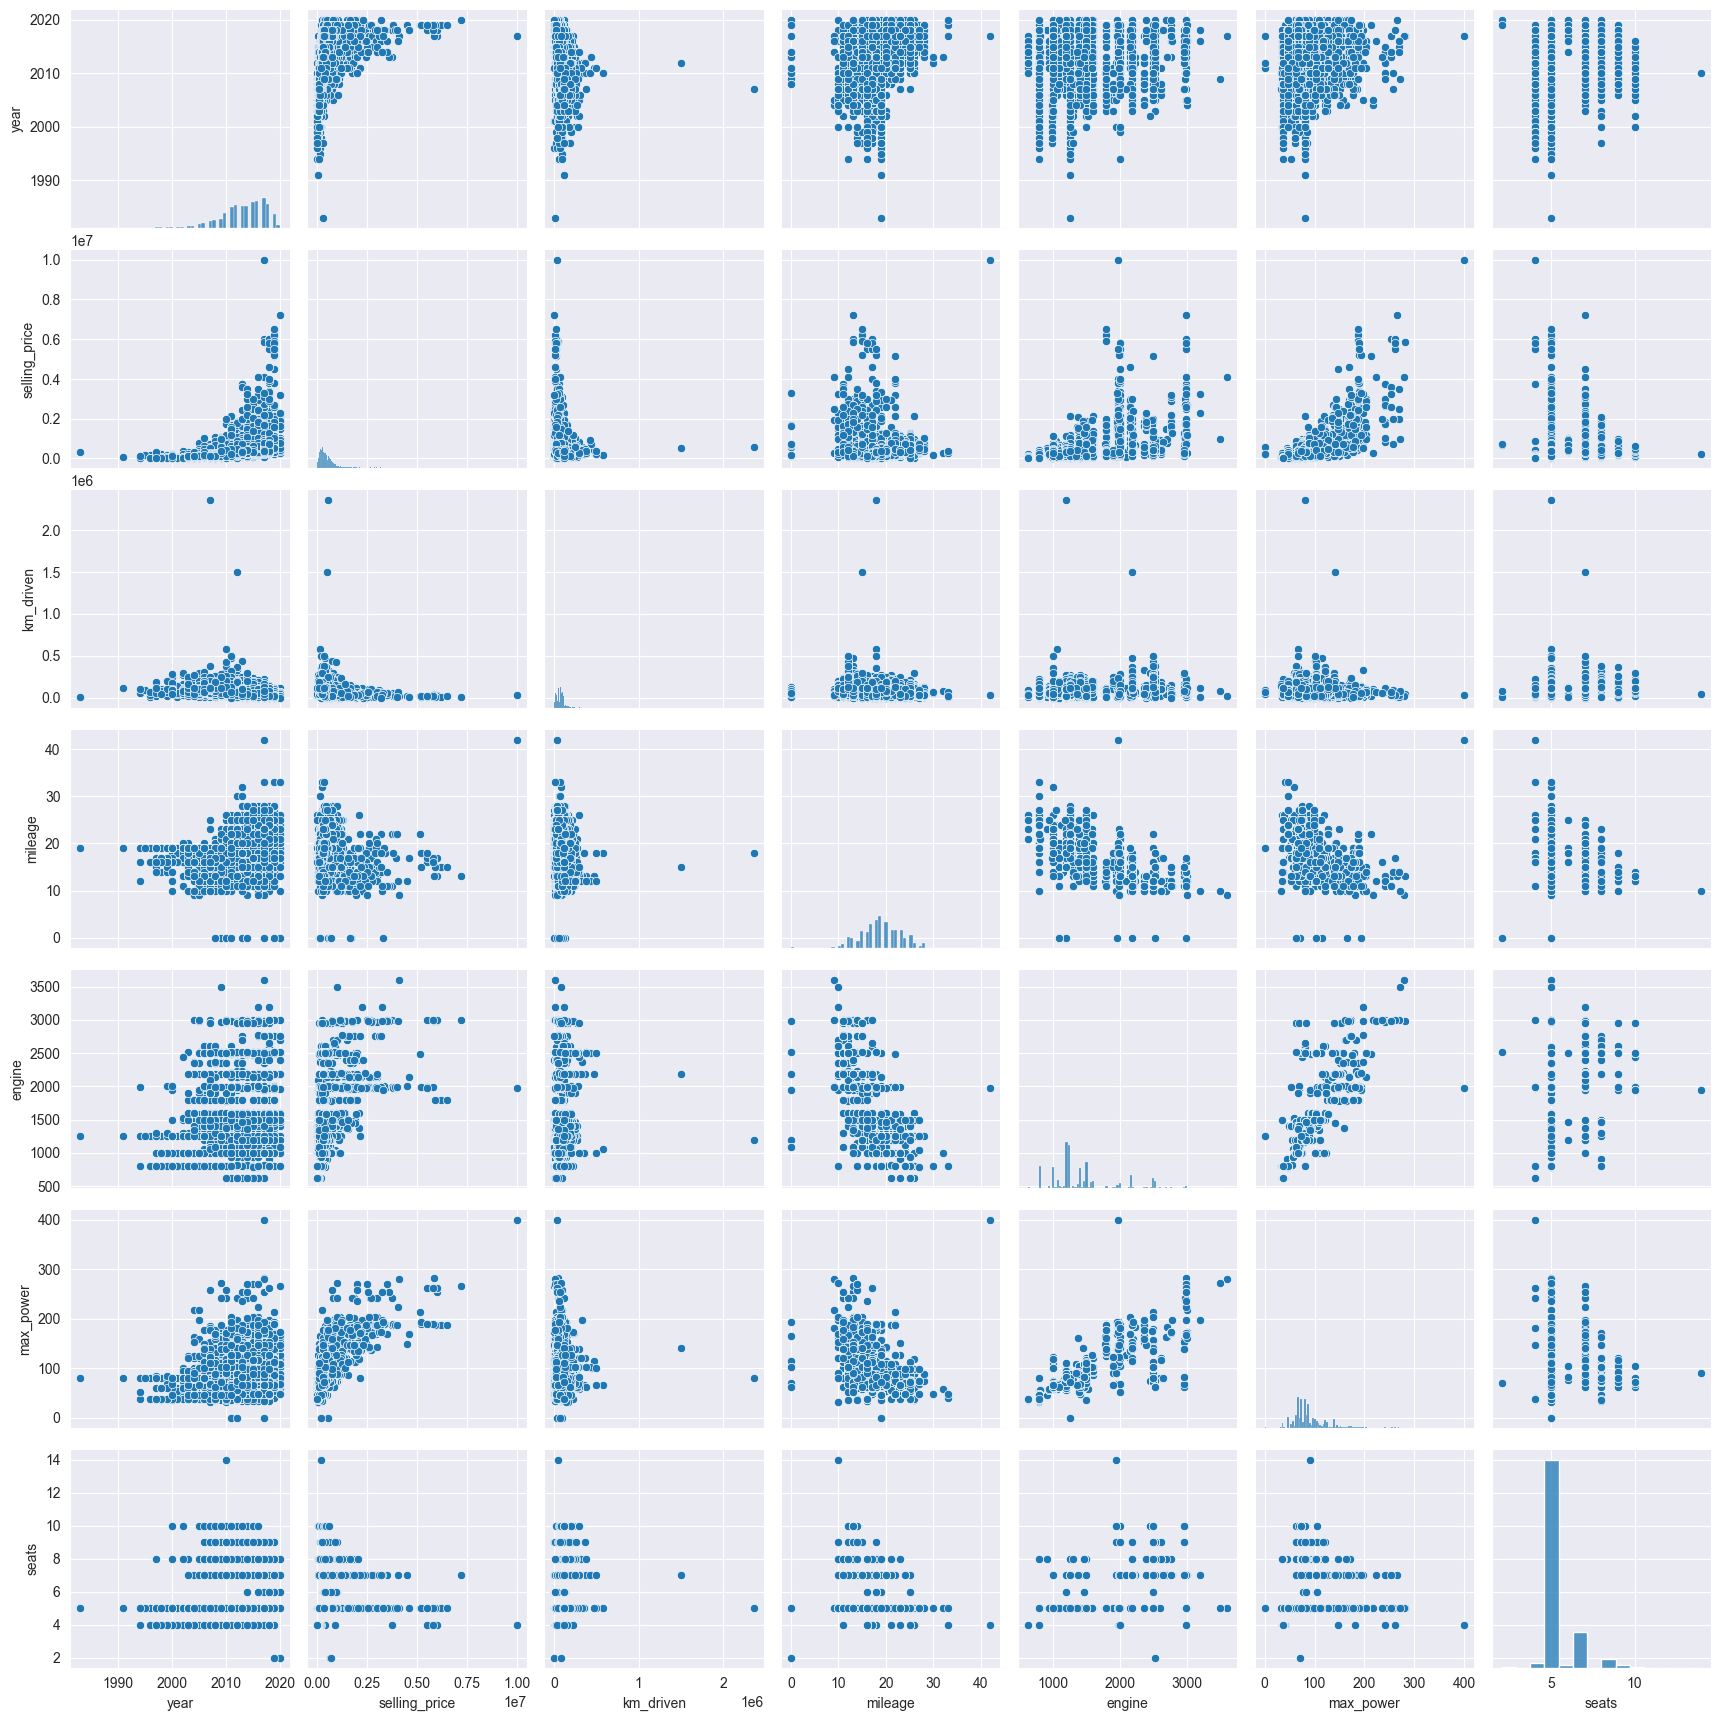

In [27]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df_train)

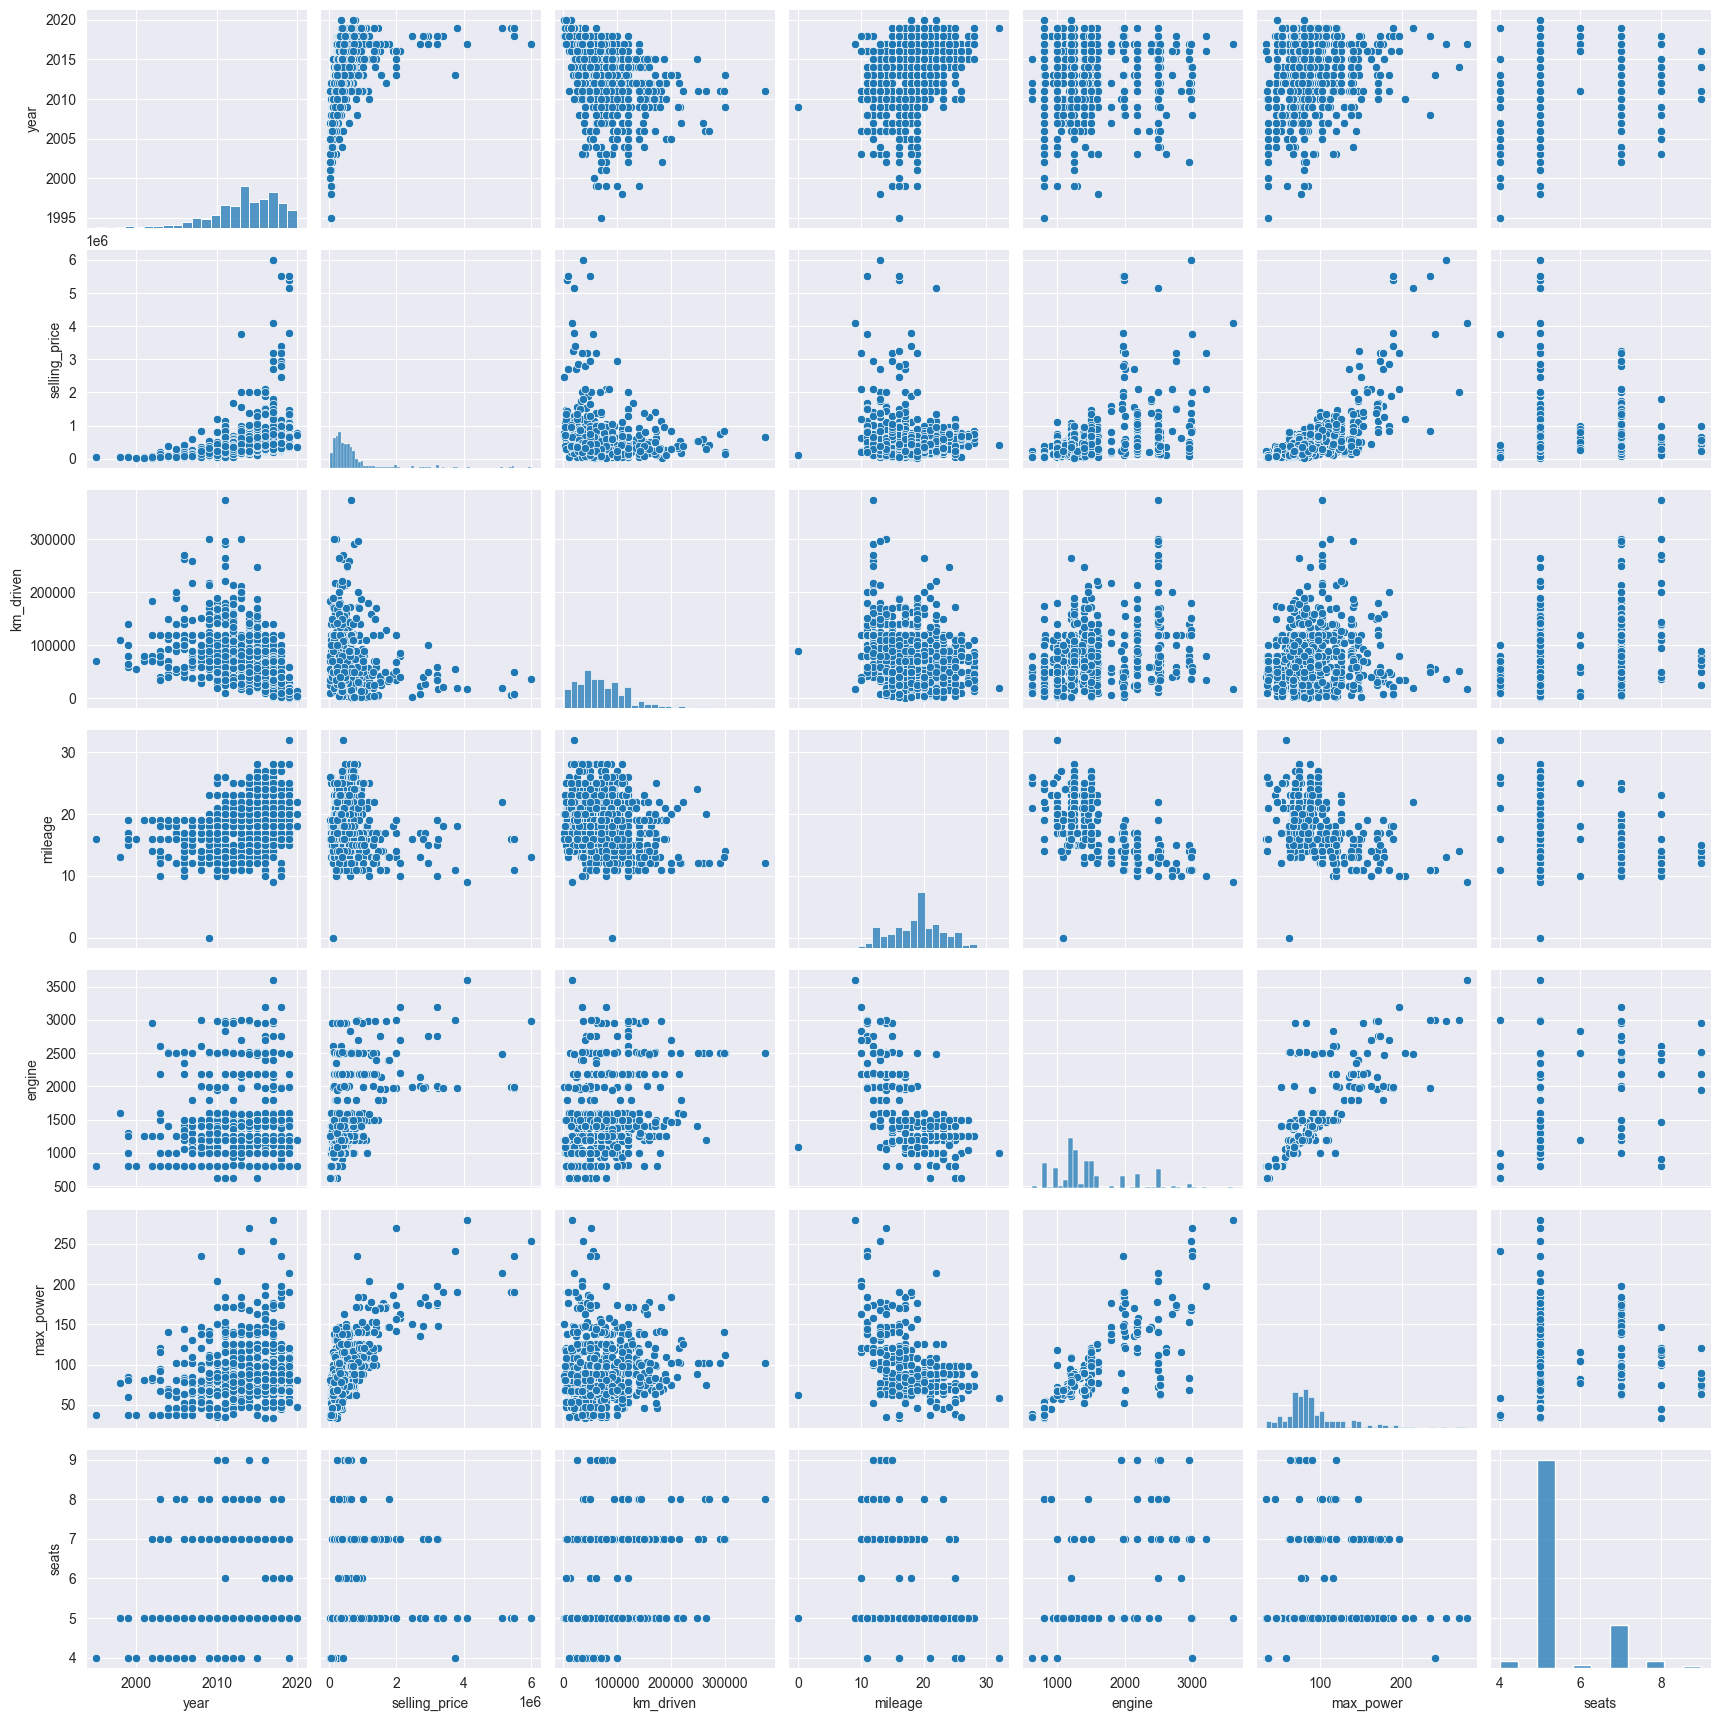

In [28]:
sns.pairplot(df_test)

## Выводы

В целом, оба графика схожи по распределению признаков

Для обоих датасетов выглядит так, что есть связь (схожесть диаграммы рассеяния) между следующими переменными:

Прямая:
- `max_power` - `selling_price`

Обратная:

- Пробег `km_driven` - `selling_price`
- Цена `year` - `selling_price`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [29]:
corr_map = df_train[num_features + ['selling_price']].corr()
corr_map

year  km_driven  mileage  engine  max_power  seats  \
year           1.00      -0.37     0.34    0.00       0.16   0.04   
km_driven     -0.37       1.00    -0.18    0.23       0.03   0.19   
mileage        0.34      -0.18     1.00   -0.57      -0.37  -0.46   
engine         0.00       0.23    -0.57    1.00       0.68   0.65   
max_power      0.16       0.03    -0.37    0.68       1.00   0.25   
seats          0.04       0.19    -0.46    0.65       0.25   1.00   
selling_price  0.43      -0.16    -0.10    0.45       0.69   0.15   

               selling_price  
year                    0.43  
km_driven              -0.16  
mileage                -0.10  
engine                  0.45  
max_power               0.69  
seats                   0.15  
selling_price           1.00

<Axes: >

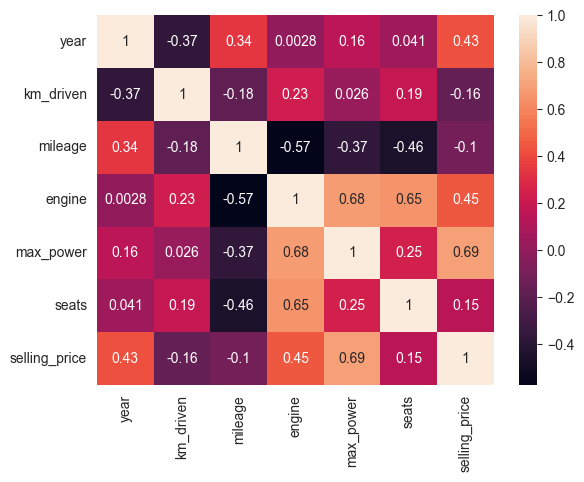

In [30]:
sns.heatmap(corr_map, annot=True)

In [31]:
# Получение корреляционных пар
# Функцию нагенерил Deepseek - вроде правильно

# Самый простой и эффективный способ
def get_corr_pairs_final(corr_map, sort_by='abs', ascending=False):
    corr_pairs = (corr_map.stack()
                  .reset_index()
                  .rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'correlation'}))

    # Убираем диагональ
    corr_pairs = corr_pairs[corr_pairs['feature1'] != corr_pairs['feature2']]

    # Убираем дубликаты A-B / B-A
    corr_pairs['sorted_features'] = corr_pairs[['feature1', 'feature2']].apply(
        lambda x: '-'.join(sorted([x['feature1'], x['feature2']])), axis=1)
    corr_pairs = corr_pairs.drop_duplicates('sorted_features').drop('sorted_features', axis=1)

    # Добавляем абсолютное значение и сортируем
    corr_pairs['abs_correlation'] = corr_pairs['correlation'].abs()

    if sort_by == 'abs':
        corr_pairs = corr_pairs.sort_values('abs_correlation', ascending=ascending)
    else:
        corr_pairs = corr_pairs.sort_values('correlation', ascending=ascending)

    return corr_pairs.reset_index(drop=True)


# Самые сильные связи
get_corr_pairs_final(corr_map, sort_by='abs', ascending=False)

feature1       feature2  correlation  abs_correlation
0   max_power  selling_price         0.69             0.69
1      engine      max_power         0.68             0.68
2      engine          seats         0.65             0.65
3     mileage         engine        -0.57             0.57
4     mileage          seats        -0.46             0.46
5      engine  selling_price         0.45             0.45
6        year  selling_price         0.43             0.43
7        year      km_driven        -0.37             0.37
8     mileage      max_power        -0.37             0.37
9        year        mileage         0.34             0.34
10  max_power          seats         0.25             0.25
11  km_driven         engine         0.23             0.23
12  km_driven          seats         0.19             0.19
13  km_driven        mileage        -0.18             0.18
14  km_driven  selling_price        -0.16             0.16
15       year      max_power         0.16             0.16
16      seats  selling_price         0.15             0.15
17    mileage  selling_price        -0.10             0.10
18       year          seats         0.04             0.04
19  km_driven      max_power         0.03             0.03
20       year         engine         0.00             0.00

In [32]:
# Самые слабые связи
get_corr_pairs_final(corr_map, sort_by='abs', ascending=True)

feature1       feature2  correlation  abs_correlation
0        year         engine         0.00             0.00
1   km_driven      max_power         0.03             0.03
2        year          seats         0.04             0.04
3     mileage  selling_price        -0.10             0.10
4       seats  selling_price         0.15             0.15
5        year      max_power         0.16             0.16
6   km_driven  selling_price        -0.16             0.16
7   km_driven        mileage        -0.18             0.18
8   km_driven          seats         0.19             0.19
9   km_driven         engine         0.23             0.23
10  max_power          seats         0.25             0.25
11       year        mileage         0.34             0.34
12    mileage      max_power        -0.37             0.37
13       year      km_driven        -0.37             0.37
14       year  selling_price         0.43             0.43
15     engine  selling_price         0.45             0.45
16    mileage          seats        -0.46             0.46
17    mileage         engine        -0.57             0.57
18     engine          seats         0.65             0.65
19     engine      max_power         0.68             0.68
20  max_power  selling_price         0.69             0.69

### Резюме по связям

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?


#### Наименее скоррелированные:

year & engine (0)
km_driven &  max_power (0.03)

## Описание связей
Прямая:

- `max_power` (Мощность) и `selling_price` стоимость (0.69) - сильная
- `engine` (Объем двигателя) и `selling_price` стоимость (0.45)
- `year` (год) и `selling_price` (чем раньше была выпущена машина, тем меньше её цена) (0.43)
- `mileage` (потребление топлива) и `year` год (0.34)

Обратная:
- `km_driven` и `year` (-0.37) (чем раньше была выпущена машина, тем больше она проехала)
- `engine` и `mileage` (-0.57)
- `max_power` и `mileage` (-0.37) # Чем больше 
- `seats` и `mileage` (-0.37)

! Между годом и пробегом есть обратная корреляция (Чем раньше была выпущена машина, тем больше её пробег)
!! Важное замечание про `mileage`, чем больше это значение, тем экономичнее значение, потому что это км на литр, а не показатель кол-ва литров на километр


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [33]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [34]:
num_features

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [35]:
X_train, y_train = df_train[num_features], df_train['selling_price']

In [36]:
assert X_train.shape == (5840, 6)

In [37]:
X_test, y_test = df_test[num_features], df_test['selling_price']

In [38]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
# Предварительно заведем необходимые переменные для трекинга

predictions = {}
metrics = {}


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error as MSE, 
    mean_absolute_percentage_error as MAPE,
    root_mean_squared_error as RMSE,
)

def evaluate(y_test, y_pred) -> None:
    metrics = {
        'r2_score': r2_score(y_test, y_pred),
        'mse': MSE(y_test, y_pred),
        'rmse': RMSE(y_test, y_pred),
        'mape': MAPE(y_test, y_pred),
    }
    
    print('R2 Score {:.4%}'.format(metrics['r2_score']))
    print('MSE Score {:.4f}'.format(metrics['mse']))
    print('RMSE Score {:.4f}'.format(metrics['rmse']))
    print('MAPE Score {:.4%}'.format(metrics['mape']))
    return metrics


In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_metrics = evaluate(y_test, y_pred)

metrics['linear_regression'] = lr_metrics
predictions['linear_regression'] = y_pred

R2 Score 59.4781%
MSE Score 232931278633.7691
RMSE Score 482629.5460
MAPE Score 62.1296%


Качество среднее:

R2 - больше 0.5 (почти 0.6) - это значит, что мы смогли объяснить около 60% дисперсии значений

MSE, RMSE - большое, мы ошибаемся где-то на 500 тысяч в своих предсказаниях

MAPE - 62% на столько мы ошибаемся в предсказании цены

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


lr_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('estimator', LinearRegression())
    ]
) 

# Fittings
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

# Estimation
sc_lr_metrics = evaluate(y_test, y_pred)

R2 Score 59.4781%
MSE Score 232931278633.7645
RMSE Score 482629.5460
MAPE Score 62.1296%


In [43]:
metrics['linear_regression_scaled'] = sc_lr_metrics
predictions['linear_regression_scaled'] = y_pred

! У меня возможно какой-то баг из-за arm процессора, или стандартизация в данном кейсе не влияет

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

- `max_power` (Мощность двигателя)

In [44]:
def get_feature_importances(features: list[str], coefs) -> pd.DataFrame:
    data = []
    for feature, coef in zip(features, coefs):
        data.append((feature, coef))
        
    stat =  pd.DataFrame(data=data, columns=['feature', 'coefficient'])
    return stat.sort_values('coefficient', ascending=False)

get_feature_importances(num_features, lr_pipe['estimator'].coef_)

feature  coefficient
4  max_power    322658.84
0       year    154230.90
3     engine     59728.38
2    mileage     26307.48
5      seats    -23816.37
1  km_driven    -43882.97

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Normalizer

from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline(
    steps=[
        ('normalizer', Normalizer()),
        ('estimator', Lasso()),
    ]
)

lasso_pipe.fit(X_train, y_train)

y_pred = lasso_pipe.predict(X_test)
lasso_metrics = evaluate(y_test, y_pred)

R2 Score 50.5065%
MSE Score 284502977416.7372
RMSE Score 533388.2052
MAPE Score 67.2238%


In [46]:
metrics['lasso'] = lasso_metrics
predictions['lasso'] = y_pred

In [47]:
get_feature_importances(num_features, lasso_pipe['estimator'].coef_)

feature  coefficient
2    mileage 485551671.21
4  max_power 240765133.25
3     engine   5686696.32
1  km_driven   4019300.20
5      seats        -0.00
0       year -15621033.88

## Оценка качества:

Качество получилось хуже (R2 меньше, ) 

Переменная `seats` занулилась

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [48]:
from sklearn.model_selection import GridSearchCV

CV_FOLDS = 10
alpha_params = np.arange(1e-5, 1.1+1e-5, 0.25)


lasso_grid_pipe = Pipeline(
    steps=[
        ('preprocessor', Normalizer()),
        ('estimator', Lasso()),
    ],
)

parameters = {
    'estimator__alpha': alpha_params,
}

cv_lasso = GridSearchCV(
    estimator=lasso_grid_pipe, 
    param_grid=parameters, 
    cv=CV_FOLDS, 
    scoring='neg_mean_squared_error',
)


cv_lasso.fit(X_train, y_train)
cv_lasso.best_params_

/Users/andrey/PycharmProjects/ai_machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+13, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
/Users/andrey/PycharmProjects/ai_machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+14, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
/Users/andrey/PycharmProjects/ai_machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

{'estimator__alpha': 0.75001}

In [49]:
lasso_grid_pipe_best = cv_lasso.best_estimator_

y_pred = lasso_grid_pipe_best.predict(X_test)
lasso_grid_pipe_metrics = evaluate(y_test, y_pred)

R2 Score 50.5192%
MSE Score 284429893480.8739
RMSE Score 533319.6916
MAPE Score 67.1023%


In [50]:
predictions['lasso_cv'] = y_pred
metrics['lasso_cv'] = lasso_grid_pipe_metrics

In [51]:
get_feature_importances(num_features, lasso_grid_pipe_best['estimator'].coef_)

feature  coefficient
2    mileage 501796295.60
4  max_power 241246832.98
3     engine   5732330.14
1  km_driven   4004575.88
5      seats        -0.00
0       year -15832878.73

In [52]:
print('Num Models', CV_FOLDS * len(alpha_params))

Num Models 50


## Ответы на вопросы

- Всего было обучено 50 моделей (CV_FOLDS x Num Params Val)
- seats по прежнему зануляется

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [53]:
from sklearn.linear_model import ElasticNet


elastic_pipe = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('estimator', ElasticNet(random_state=42))
])

l1_ratio_params = np.arange(0.1, 1.1, 0.1)
max_iter_params = np.arange(1000, 4000, 1000)
tol_params = [1e-4, 1e-3, 1e-2]


parameters = {
    'estimator__alpha': alpha_params,
    'estimator__l1_ratio': l1_ratio_params,
    'estimator__max_iter': max_iter_params,
    'estimator__tol': tol_params,
}

cv_elastic = GridSearchCV(
    estimator=elastic_pipe, 
    param_grid=parameters, 
    cv=10, 
    scoring='neg_mean_squared_error',
)

cv_elastic.fit(X_train, y_train)
cv_elastic.best_params_

{'estimator__alpha': 0.25001,
 'estimator__l1_ratio': 0.9,
 'estimator__max_iter': 1000,
 'estimator__tol': 0.01}

In [54]:
elastic_grid_pipe_best = cv_elastic.best_estimator_

y_pred = elastic_grid_pipe_best.predict(X_test)
elastic_grid_pipe_metrics = evaluate(y_test, y_pred)

R2 Score 58.9255%
MSE Score 236108134761.6973
RMSE Score 485909.5953
MAPE Score 60.6269%


In [55]:
predictions['elastic_cv'] = y_pred
metrics['elastic_cv'] = elastic_grid_pipe_metrics

In [56]:
# Обучено моделей
print('Обучено моделей', CV_FOLDS * len(l1_ratio_params)* len(max_iter_params) * len(tol_params))

Обучено моделей 900


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


In [57]:
X_train_cat = df_train[num_features + cat_features]
X_test_cat = df_test[num_features + cat_features]

X_train_cat.head()

year  km_driven  mileage  engine  max_power  seats  \
0  2014     145500       23    1248         74      5   
1  2014     120000       21    1498        103      5   
2  2010     127000       23    1396         90      5   
3  2007     120000       16    1298         88      5   
4  2017      45000       20    1197         81      5   

                            name    fuel seller_type transmission  \
0         Maruti Swift Dzire VDI  Diesel  Individual       Manual   
1   Skoda Rapid 1.5 TDI Ambition  Diesel  Individual       Manual   
2      Hyundai i20 Sportz Diesel  Diesel  Individual       Manual   
3         Maruti Swift VXI BSIII  Petrol  Individual       Manual   
4  Hyundai Xcent 1.2 VTVT E Plus  Petrol  Individual       Manual   

          owner  
0   First Owner  
1  Second Owner  
2   First Owner  
3   First Owner  
4   First Owner

**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert


Переменная бранд
В столбце name указана модель машины, мы очень легко и просто можем добавить марку производителя (она стоит первым токеном)

In [58]:
def preprocess_name(df) -> pd.DataFrame:
    df = df.copy()
    df['model'] = df['name'].apply(lambda x: x.split()[0] + '_' + x.split()[1])
    df = df.drop(columns=['name'])
    return df

X_train_cat = preprocess_name(X_train_cat)
X_test_cat = preprocess_name(X_test_cat)

In [59]:
assert X_train_cat.shape == (5840, 11)  # скорректировал

In [60]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner         model
count     5840        5840         5840         5840          5840
unique       4           3            2            5           205
top     Diesel  Individual       Manual  First Owner  Maruti_Swift
freq      3177        5223         5336         3603           558

In [61]:
X_train_cat

year  km_driven  mileage  engine  max_power  seats    fuel seller_type  \
0     2014     145500       23    1248         74      5  Diesel  Individual   
1     2014     120000       21    1498        103      5  Diesel  Individual   
2     2010     127000       23    1396         90      5  Diesel  Individual   
3     2007     120000       16    1298         88      5  Petrol  Individual   
4     2017      45000       20    1197         81      5  Petrol  Individual   
...    ...        ...      ...     ...        ...    ...     ...         ...   
5835  2008     191000       17    1086         62      5  Petrol  Individual   
5836  2013      50000       18     998         67      5  Petrol  Individual   
5837  2013     110000       18    1197         82      5  Petrol  Individual   
5838  2007     119000       16    1493        110      5  Diesel  Individual   
5839  2009     120000       19    1248         73      5  Diesel  Individual   

     transmission                 owner           model  
0          Manual           First Owner    Maruti_Swift  
1          Manual          Second Owner     Skoda_Rapid  
2          Manual           First Owner     Hyundai_i20  
3          Manual           First Owner    Maruti_Swift  
4          Manual           First Owner   Hyundai_Xcent  
...           ...                   ...             ...  
5835       Manual           First Owner  Hyundai_Santro  
5836       Manual          Second Owner    Maruti_Wagon  
5837       Manual           First Owner     Hyundai_i20  
5838       Manual  Fourth & Above Owner   Hyundai_Verna  
5839       Manual           First Owner    Maruti_Swift  

[5840 rows x 11 columns]

### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist')

ohe_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'model']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

X_train_ohe = ohe.fit_transform(X_train_cat[ohe_cols])
X_test_ohe = ohe.transform(X_test_cat[ohe_cols])



print('Train', X_train_ohe.shape)
print('Test', X_test_ohe.shape)

Train (5840, 214)
Test (1000, 214)


/Users/andrey/PycharmProjects/ai_machine_learning/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [63]:
X_train_w_ohe = pd.concat([X_train_ohe, X_train_cat[num_cols]], axis=1)
X_test_w_ohe = pd.concat([X_test_ohe, X_test_cat[num_cols]], axis=1)

display(X_train_w_ohe.shape)
display(X_test_w_ohe.shape)

(5840, 219)

(1000, 219)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Качество модели не улучшилось судя по метрикам ниже

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

CV_FOLDS = 10
alpha_params = np.arange(1e-5, 1.1+1e-5, 0.1)

ridge = Ridge()

parameters = {
    'alpha': alpha_params,
}

cv_ridge = GridSearchCV(
    estimator=ridge, 
    param_grid=parameters, 
    cv=CV_FOLDS, 
    scoring='r2',
)


cv_ridge.fit(X_train, y_train)
cv_ridge.best_params_

{'alpha': 1e-05}

In [65]:
ridge_best = cv_ridge.best_estimator_

y_pred = ridge_best.predict(X_test)
ridge_best_metrics = evaluate(y_test, y_pred)

R2 Score 59.4781%
MSE Score 232931278640.4370
RMSE Score 482629.5460
MAPE Score 62.1296%


In [66]:
predictions['ridge_cv'] = y_pred
metrics['ridge_cv'] = ridge_best_metrics

In [67]:
get_feature_importances(list(X_train_w_ohe.columns), ridge_best.coef_)

feature  coefficient
0                   fuel_Diesel     37660.73
4  seller_type_Trustmark Dealer     10206.66
2                   fuel_Petrol      6567.21
3        seller_type_Individual       122.99
1                      fuel_LPG        -0.73
5           transmission_Manual    -24246.51

In [68]:
# Теперь соберем все метрики воедино
metrics_df = pd.DataFrame.from_dict(metrics).T
metrics_df

r2_score             mse      rmse  mape
linear_regression             0.59 232931278633.77 482629.55  0.62
linear_regression_scaled      0.59 232931278633.76 482629.55  0.62
lasso                         0.51 284502977416.74 533388.21  0.67
lasso_cv                      0.51 284429893480.87 533319.69  0.67
elastic_cv                    0.59 236108134761.70 485909.60  0.61
ridge_cv                      0.59 232931278640.44 482629.55  0.62

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [69]:
def business_metric(y_true, y_pred, tolerance: float = 0.1):
    # Считаем отклонение от реальной цены в абсолютных значениях
    relative_errors = np.abs((y_true - y_pred) / y_true)
    # По маске считаем долю
    within_tolerance = np.mean(relative_errors <= tolerance)
    
    return within_tolerance



In [70]:
business_results = []

for model, predicted in predictions.items():
    measure = business_metric(y_test, predicted)
    business_results.append((model, measure))
    
business_results = pd.DataFrame(data=business_results, columns=['model', 'err_percentage'])
business_results.sort_values(by='err_percentage', ascending=True)

model  err_percentage
2                     lasso            0.15
3                  lasso_cv            0.15
0         linear_regression            0.22
1  linear_regression_scaled            0.22
5                  ridge_cv            0.22
4                elastic_cv            0.23

Ни одной из моделей не удалось попасть в требуемый диапазон по качеству 

Лучше всего эту задачу решает модель Lasso 

# Сохранение результатов

In [71]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(lasso_pipe, f)

In [77]:
# Test
from sklearn.utils.validation import check_is_fitted

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    
print(model)

Pipeline(steps=[('normalizer', Normalizer()), ('estimator', Lasso())])


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
